# Jupyter Notebook Optimization model using Linear Programming in R


**Description**:Linear Programming is extensively used as a quantitative method for optimization. Its origin dates back to 1937.  It was developed as a technique for planning expenditures and returns in order to optimize cost. LP is useful in a wide variety of situations, while maintaining a simple framework.

**Purpose**: This notebook provides a template for solving optimization problems. It highlights how one can go about formulating the problem in order to use the functions within the lpsolve package to obtain a result that meets all of the given constraints



Imagine you are on an engagement where a company has two products, A and B. First the constraints("Budget") are outlined. Each unit of  A  consumes 30 working hours and each unit of B consumes 20 working hours. The limit of working hours is 2700 hours

Additionally lets assume their is restriction to how long the machines used to produce the products can run. Each unit of product A consumes 5 machine hours and for product B 10 machine hours are consumed. Lets assume there is a limit of 850 hours for the machine 

Lastly, for technical reasons, the business must produce a minimum of 95 units between both products. Now how many units of product A and B must be produced in order to maximize total profits? 

Now that we have our objective function  and our parameters, lets formulate the problem.


* Max(z)= 20A+ 60B
* st(subject to the below constraints)
 * WH 30A+20B <= 2700 
 * MH 5A+ 10B <= 850
 * PM A+B >= 95
 * A >=0, B >= 0
  
  
  # Dependencies
  
  Load the package for model development
  * lpSolve

First we will need to install the lpsolve package from R. Addtional information about the package can be found on https://cran.r-project.org/web/packages/lpSolve/lpSolve.pdf

https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf

https://cran.r-project.org/web/packages/igraph/igraph.pdf

once the package is loaded we will start by setting the objective function

In [1]:
#install.packages("lpsolve")
install.packages("lpSolve",repos="http://cran.rstudio.com/")
library(lpSolve)


package 'lpSolve' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alarrieux001\AppData\Local\Temp\RtmpqCG1w1\downloaded_packages


Warning message:
"package 'lpSolve' was built under R version 3.5.2"

In [9]:
install.packages("ggplot2",repos="http://cran.rstudio.com/")
library("ggplot2")


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alarrieux001\AppData\Local\Temp\RtmpqCG1w1\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.5.3"

In [1]:
install.packages("igraph", repos ="http://cran.rstudio.com/")
library("igraph")

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alarrieux001\AppData\Local\Temp\Rtmpesuc4h\downloaded_packages


Warning message:
"package 'igraph' was built under R version 3.5.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



Note: Once you have installed the package and loaded it, you can add a # in front in order to comment them out. This is done, so the package is not reinstalled when going through the code again.(e.g #install.packages("lpSolve",repos="http://cran.rstudio.com/")

Set up your objective function

In [ ]:
objective.in <- c(20,60)



Next we will set up the constraints. Avaiblable working hours, machine hours, and the pm( amount produced and sold)
The below a 2 by 2 matrix that will correspond to the constrained outlined above. 

In [ ]:
const.mat <- matrix(c(30,20,5,10,1,1),ncol=2, byrow=TRUE)

Once that is done we will set up the direction meaning greater or less than and equal to signs. This dictate what minimum or maximum each constraint should meet.

In [ ]:
const.dir <- c("<=","<=",">=")


Now that we have the direction we want to outline the resource constraints. Think of it as the "budget" in other words we must produce at least this amount but cannot go above this amount

In [ ]:
const.rhs <- c(2700,850,95)


Now that we have set up problem we will use the lp function wich takes in the variable above in order to get a optimal answer. 

In [ ]:
prod.solv <- lpSolve::lp("max",objective.in,const.mat,const.dir,const.rhs,compute.sens = TRUE)

Lets call the prod.solv variable in order to get the optimal solution for product A and B

In [ ]:
prod.solv$solution

Which produces an optimal solution of 
* 20 units of product A 
* 75 units of product B

In order to visualize the above we would need to find  Where the points for each constraints lie on the x and y axis. After some quick calculations we get the following for each constraints
* X1(90,0), X2(170,0),X3(95,0)
* Y1(0,135),Y2(0,85),Y3(0,95)

        * An example of how we arrived at the above is as follows, same logic would apply for all three constraints
        * Lets firs solve for X for the constraint 30x+20y <=2700
        * Lets update the equation to have the aboove equal to 2700 and setting y to 0. So we get the following
            * 30x+20(0)=2700
            *30X=2700
            *x=90 (this after dividing 30 on both sides)
            * Now lets solve for Y by setting x to 0 and as we did above having the equation equalling to 2700
            * 30(0)+20(y)=2700
            *20y=2700
            *y=135 (this is after dividing both side by 20)

For those who prefer the y intercept form we can achive the same as above by changing from standard form to the y-intercept form e.g y=mx+b. 

* Working hours would be Y(for B) = -1.5*X(represents A)+ 135
* Machine Hours would be Y = -1/2*X + 85
* Product Manufactured would be y = X+95

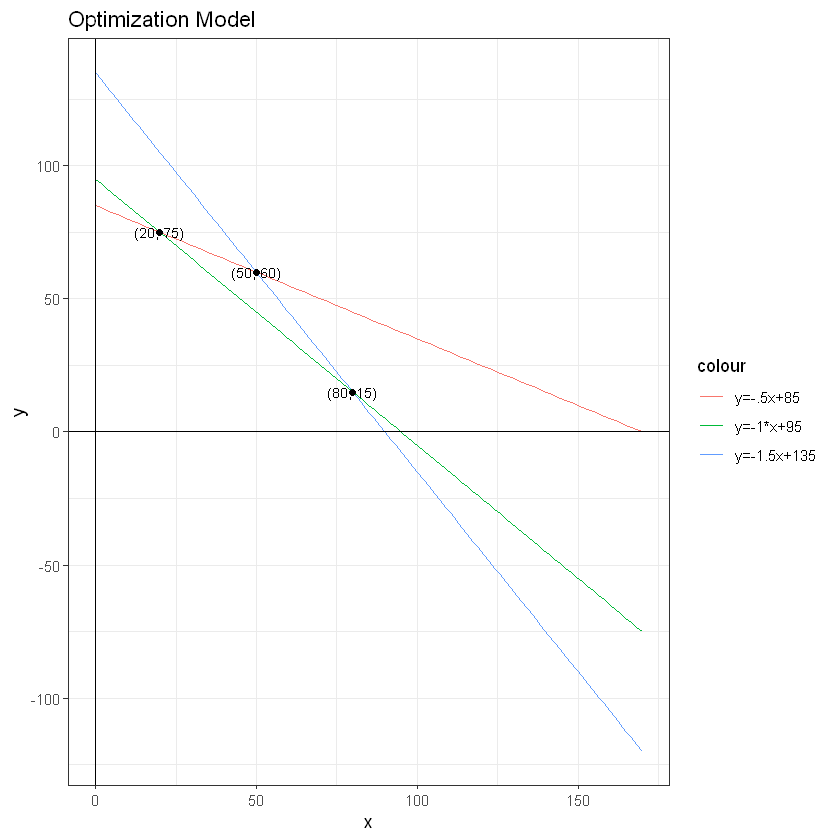

In [11]:
# We will create a vector with the points 
intPoint <- data.frame(x=c(20,50,80), y=c(75,60,15))


ggplot(data.frame(x=c(0,170)),aes(x)) + 
  stat_function(fun=function(x) -1.5*x+135, geom="line", aes(col='y=-1.5x+135')) +
  stat_function(fun=function(x) -.5*x + 85, geom="line", aes(col='y=-.5x+85')) +
  stat_function(fun=function(x)-1*x+95, geom="line", aes(col='y=-1*x+95')) +
  geom_vline(xintercept=0, aes(col= 'x=0')) + 
  geom_hline(yintercept= 0, aes(col='y=0')) + 
  theme_bw() + 
  labs(title = 'Optimization Model') + 
  geom_point(data=intPoint, aes(x,y)) + 
  annotate('text', x = 20, y = 75, label="(20, 75)", size=3 ) + 
  annotate('text', x = 50, y = 60, label="(50, 60)", size=3 ) + 
  annotate('text', x = 80, y = 15, label="(80, 15)", size=3 ) 


In [12]:
S1 <- (20*20)+(75*60)
S2 <- (50*20)+(60*60)
S3 <- (80*20)+(15*60)

items <- c("Solution 1", "Solution 2", "Solution 3")
Product_A <- c(20,50,80)
Product_B <- c(75,60,15)
Price_A <- rep(20,3)
Price_B <- rep(60,3)
Total <- c(S1,S2,S3)
Answer <- data.frame(items,Product_A,Price_A,Product_B,Price_B,Total)

In [13]:
Answer

items,Product_A,Price_A,Product_B,Price_B,Total
Solution 1,20,20,75,60,4900
Solution 2,50,20,60,60,4600
Solution 3,80,20,15,60,2500


# Lets try to increase the variables and solve a similar problem

Imagine a factory that produces four different types of wood paneling, L,W,U, and F. Each Type of paneling is made by gluing and pressing together a different mixture of pine and oak chips.

Now lets assume the following. For glue 50L+50W+ 100U+ 50F there is a resource constraint of 5800. Pressing capacity 5L+15W+10U+5F there is a resource constraint of 730. For Oak chips 500L+ 750W+250U+500F there is a resource constraint of 60,500. For pine chips 500L+400W+300U+200F there is a resource constraint of 29,200

The objective function becomes to maximize profits given the below

* M(z): 450L+1150W+800U+400F
* Subject to
  * Glue     50L+50W+ 100U+ 50F  <=  5800 
  * Pressing 5L+ 15W+ 10U + 5F   <=   730 
  * Pine     500L+400W+300U+200F <= 29200
  * Oak      500L+750W+250U+500F <= 60500

In [2]:
#we should have the lpsolve package install and loaded if now please include the below
#install.packages("lpSolve",repos="http://cran.rstudio.com/")
#library(lpSolve)
objective <- c(450, 1150, 800, 400)

In [15]:
conMat <- matrix(c(50,50,100,50,5,15,10,5,500,400,300,200,500,750,250,500),ncol=4, byrow= TRUE)

In [16]:
conMat

50,50,100,50
5,15,10,5
500,400,300,200
500,750,250,500


In [17]:
condir <- c("<=","<=","<=","<=")

In [18]:
conrhs <- c(5800,730,29200,60500)

In [19]:
prod.sol <- lpSolve::lp(direction='max',objective,conMat,condir,conrhs,compute.sen= TRUE)

In [20]:
prod.sol

Success: the objective function is 58800 

In [21]:
prod.sol$solution

[1] 23 15 39  0

We can see when the number of variables increase, actually calling all of them may end up becoming very tedious and cumbersome. When we need room for more flexibility the lpsolve package also allows room to account for such scenarios

Lets consider a transportation problem of two origins A and B, and three destinations 1,2, and 3. The cost of transporting one unit from the origin i and the destination j are outlined below. As well as the maximal capacity of the origins and the required demand in the destination

The objective function then becomes how we must cover demand of the destinations at a minimal cost

 * Min = 8xa1+6xa2+3xa3+2xb1+4xb2+9xb3
 * st(Subject to)
  * CA xa1+xa2+xa3 <= 70
  * CB xb1+xb2+xb3 <= 40
  * D1 xa1+xb1 >= 40
  * D2 xa2 +xb2 >= 35
  * D3 xa3+xb3 >= 25
  * Xij >=0

**First lets set the objective function**


In [43]:
objective <- c(8,6,3,2,4,9)

# the below list out the constraints and available variable. M represents the origin locations available 
#while N represents the destination locations available

m <-2
n <- 3

**Next lets list out the constraint matrix**
This is where we start noticing the differences from our first linear programming example. Below we will outline the constraint matrix of 0, the rows within the matrix will be n+m( in this case 5), the columns will n*m(in this case 6)

#lets breakdown the below for i in 1:m. Meaning for every one origin selected from the availabe origin set
#and for every j, meaning for every one destination selected in the available selection set. Lets outline the below constraints. We set both constraints to 1 as the number of origin location to be selected and the corresponding destination location to be selected

In [44]:
constr <- matrix(0, n+m, n*m)

for(i in 1:m){
    for(j in 1:n){
        constr[i, n*(i-1)+j] <- 1
        constr[m+j,n*(i-1)+j] <- 1
    }
}

Now that we have set our constraints, similar to the above lets outline the direction i.e. greater than or less than. Also note we are referencing the corresponding variable M and N. In the first we outline that the capacity of the origin destinations must be less than or equal to the given origin location. While the second outline the demand in other words the demand delivered must be greater than or equal to demand of that destination location

In [45]:
constrdir <- c(rep("<=",m), rep(">=", n))

Below we will set out our "Budget" for each resource

In [46]:
constrrhs <- c(70,40,40,35,25)

Now that we have outlined both our objective function and our constraints. We will solve for the optimal solution similar to the above by calling on the lp function

In [47]:
prod.sol2 <- lpSolve::lp(direction='min',objective,constr,constrdir,constrrhs,compute.sens = TRUE)

In [48]:
prod.sol2$solution

[1]  0 35 25 40  0  0

In [49]:
sol <- matrix(prod.sol2$solution,m,n, byrow= TRUE)

In [53]:
City <- c("CA","CB")

In [54]:
Answer3 <- data.frame(City,sol)

In [55]:
Answer3

City,X1,X2,X3
CA,0,35,25
CB,40,0,0


Above we can see an optimal solution that meets all constraints.

Now lets assume we wanted to visualize the network above. Meaning Origin to destination. We can do so using the igraph package in R

In [56]:
NetworkSolution1 <- igraph::graph(edge=c("CA","35", "CA","25", "CB","40"), directed =T)



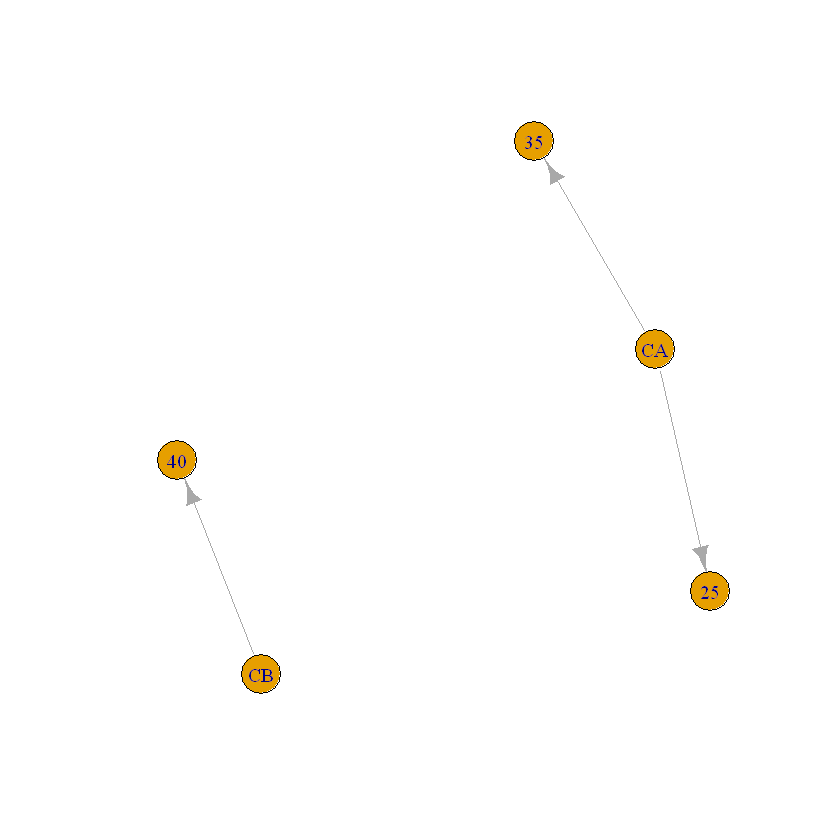

In [57]:
plot(NetworkSolution1)

# Let's try one more using the above framework

Wheat is harvested in the midwest and stored in grain elevators in three differnect cities. These grain elevators supply three flour mills. Grain is shipped to the mills in rail road cars, each car capable of holding one ton of wheat. The Supply constrints are as follows

Elevator 1 = 150
Elevator 2 = 175
Elevator 3 = 275
 
Demand Constraint are as follows
City     1 = 200
City     2 = 100
City     3 = 300
The problem is to determine how many tons of wheat to transport from each grain elavator to each mill on a monthly basis in order to minimize  total cost of transportation.

* Min(z) =6x1a +8x1b+10x1c+7x2a+11x2b+11x2c+4x3a+5x3b+12x3c
* Subject to
    * x1a+x1b+x1c = 150
    * x2a+x2b+x2c = 175
    * x3A+x3b+x3c = 275
    * x1a+x2a+x3a = 200
    * x1b+x2b+x3b = 100
    * x1c+x2c+x3c = 300
    * xij>=0 #non negative constraints
    

In [29]:
objective3 <- c(6,8,10,7,11,11,4,5,12)

m <- 3

n <- 3


In [30]:
constr3 <- matrix(0, m+n, m*n)

for(i in 1:n){
    for(j in 1:m){
        constr3[i, n*(i-1)+j]<- 1
        constr3[m+j, n*(i-1)+j]<- 1
    }
}

In [31]:
condir3 <- c("=","=","=","=","=","=")

In [32]:
consrhs3 <- c(150,175,275,200,100,300)


In [33]:
prod.sol3 <- lpSolve::lp(direction = 'min',objective3,constr3,condir3,consrhs3, compute.sens = TRUE)

In [34]:
sol3 <- matrix(prod.sol3$solution,m,n, byrow = TRUE)

In [35]:
items4 <- c("Elevator1","Elevator2","Elevator3")

In [36]:
Answer4 <- data.frame(items4, sol3)

In [39]:
Answer4

items4,X1,X2,X3
Elevator1,0,0,150
Elevator2,25,0,150
Elevator3,175,100,0


In [40]:
NetworkSol2 <- igraph::graph(edge=c("Elevator1","City3", "Elevator2","City1", "Elevator2","City3", "Elevator3","City1", "Elevator3","City2"), directed= T)

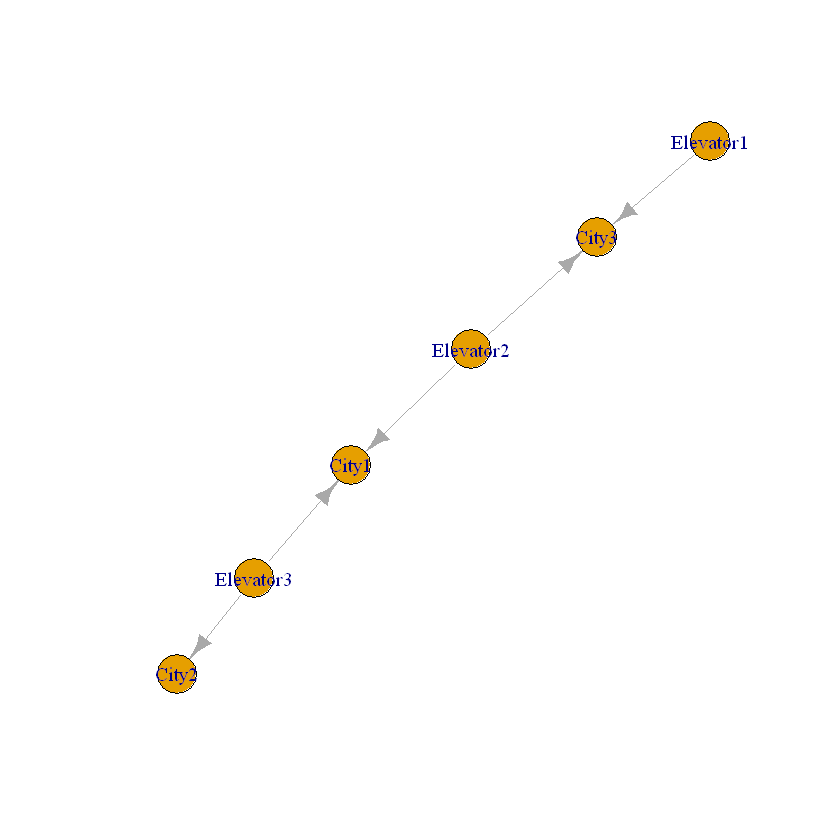

In [41]:
plot(NetworkSol2)

# Congrats! you were able to walk through some scenarios that helps produce optimal solutions